In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import HashingVectorizer

/home/y.romanikhin/.virtualenvs/venv/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Подготовка данных (urls)

In [82]:
urls_train_df = pd.read_csv('data/url_domain_train', header=None, delimiter='\t')

In [83]:
urls_train_df.head()

,0,1,2
0,000000014B60815F65B38258011B6C01,login.rutracker.org,1
1,000000014B60815F65B38258011B6C01,rutracker.org,4
2,000000014C03DA2A47AC433A0C755201,admin.tour-spb.net,1
3,000000014C03DA2A47AC433A0C755201,czinfo.ru,1
4,000000014C03DA2A47AC433A0C755201,forumsostav.ru,1


In [84]:
urls_train_df.columns = ['Id', 'url', 'count']
urls_train_df = urls_train_df[['Id', 'url']]

In [85]:
urls_train_df.head()

,Id,url
0,000000014B60815F65B38258011B6C01,login.rutracker.org
1,000000014B60815F65B38258011B6C01,rutracker.org
2,000000014C03DA2A47AC433A0C755201,admin.tour-spb.net
3,000000014C03DA2A47AC433A0C755201,czinfo.ru
4,000000014C03DA2A47AC433A0C755201,forumsostav.ru


In [86]:
age_train_df = pd.read_csv('data/age_profile_train', header=None, delimiter='\t')
age_train_df.columns = ['Id', 'age']

In [87]:
age_train_df.head()

,Id,age
0,000000013CB5719C0000A2C90002C101,53
1,00000001442BE24000001B7D00F50801,48
2,00000001448580F800003F1B31FB0901,28
3,0000000145BDB2FF000157971645E901,44
4,000000014602771F0000DB9359714C01,48


In [88]:
train_df = urls_train_df.merge(age_train_df, on='Id', how='left')

In [89]:
train_df = train_df.sort_values(by="Id")

In [90]:
train_df.head()

,Id,url,age
771156,000000013CB5719C0000A2C90002C101,mail.rambler.ru,53
771157,000000013CB5719C0000A2C90002C101,r0.ru,53
771155,000000013CB5719C0000A2C90002C101,id.rambler.ru,53
1218021,00000001442BE24000001B7D00F50801,pfrf.ru,48
1218022,00000001442BE24000001B7D00F50801,photography-on-the.ru,48


In [93]:
train_df["decade"] = train_df.age.apply(lambda x: int(np.floor(x/10)))

In [94]:
%%time
aggreg = train_df.groupby(["url", "decade"]).age.count().unstack()
aggreg = aggreg.fillna(0)
aggreg = aggreg.reset_index()

CPU times: user 851 ms, sys: 0 ns, total: 851 ms
Wall time: 849 ms


In [95]:
aggreg["all_cnt"] = aggreg[aggreg.columns[1:]].sum(axis=1)

In [96]:
aggreg.head()

decade,url,0,1,2,3,4,5,6,7,8,9,all_cnt
0,0-1.a100.nthosting.ru,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,0-1.ru,5.0,2.0,37.0,61.0,38.0,24.0,8.0,1.0,0.0,0.0,176.0
2,0-15kdm.ru,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0-3.ru,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0-360.ru,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [97]:
aggreg.shape

(130650, 12)

In [98]:
aggreg_filt = aggreg   #[aggreg.all_cnt > 0]

In [99]:
aggreg_filt.head()

decade,url,0,1,2,3,4,5,6,7,8,9,all_cnt
0,0-1.a100.nthosting.ru,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,0-1.ru,5.0,2.0,37.0,61.0,38.0,24.0,8.0,1.0,0.0,0.0,176.0
2,0-15kdm.ru,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0-3.ru,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0-360.ru,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [100]:
aggreg_filt.shape

(130650, 12)

In [101]:
urls_train_df.shape

(2046869, 2)

In [102]:
all_set = urls_train_df.merge(aggreg_filt, how="outer")
all_set = all_set.sort_values(by="Id")

In [103]:
aggr_set = all_set.groupby("Id").sum()

In [104]:
age_train_df = pd.read_csv('data/age_profile_train', header=None, delimiter='\t')
age_train_df.columns = ['Id', 'age']

In [105]:
age_train_df.shape

(118679, 2)

In [106]:
age_train_df.head()

,Id,age
0,000000013CB5719C0000A2C90002C101,53
1,00000001442BE24000001B7D00F50801,48
2,00000001448580F800003F1B31FB0901,28
3,0000000145BDB2FF000157971645E901,44
4,000000014602771F0000DB9359714C01,48


In [47]:
allset = aggr_set.reset_index().merge(age_train_df, how="left")

In [32]:
allset.shape

(118603, 102)

In [48]:
allset.to_csv("allset_prob_urls_20.csv", index=False)

In [ ]:
allset

посмотрим количество урлов в зависимости от возраста (молодые - чаще?)

In [7]:
urls_train_df = pd.read_csv('data/url_domain_train', header=None, delimiter='\t')
urls_train_df.columns = ['Id', 'url', 'Count']

In [4]:
urls_train_df.head()

,Id,url,count
0,000000014B60815F65B38258011B6C01,login.rutracker.org,1
1,000000014B60815F65B38258011B6C01,rutracker.org,4
2,000000014C03DA2A47AC433A0C755201,admin.tour-spb.net,1
3,000000014C03DA2A47AC433A0C755201,czinfo.ru,1
4,000000014C03DA2A47AC433A0C755201,forumsostav.ru,1


In [11]:
freq_url = urls_train_df.groupby("Id").Count.sum().reset_index()

In [12]:
freq_url.head()

,Id,Count
0,000000013CB5719C0000A2C90002C101,3
1,00000001442BE24000001B7D00F50801,83
2,00000001448580F800003F1B31FB0901,1
3,0000000145BDB2FF000157971645E901,12
4,000000014602771F0000DB9359714C01,11


In [16]:
merged = age_train_df.merge(freq_url, on='Id', how='left')

In [32]:
aggr_freq_urls = pd.concat([merged[["age", "Count"]].groupby("age").Count.mean(), merged[["age", "Count"]].groupby("age").Count.count()], axis=1)
aggr_freq_urls.columns = ["Mean_cnt", "Cnt"]

In [33]:
aggr_freq_urls.head()

,Mean_cnt,Cnt
age,,
0,33.448276,29
1,38.648734,316
2,35.364431,343
3,39.189394,396
4,42.265873,252


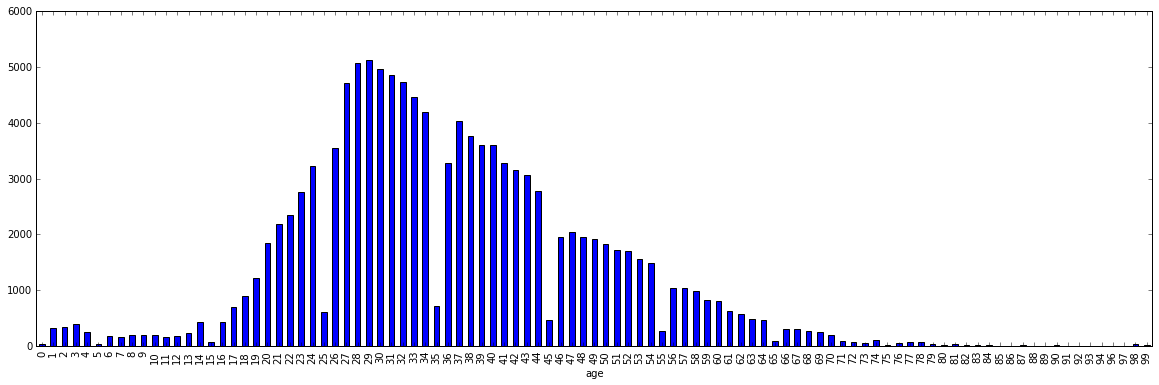

In [41]:
%matplotlib inline
aggr_freq_urls.Cnt.plot(kind="bar", figsize=(20, 6))   # похоже с гистограммой возрастов

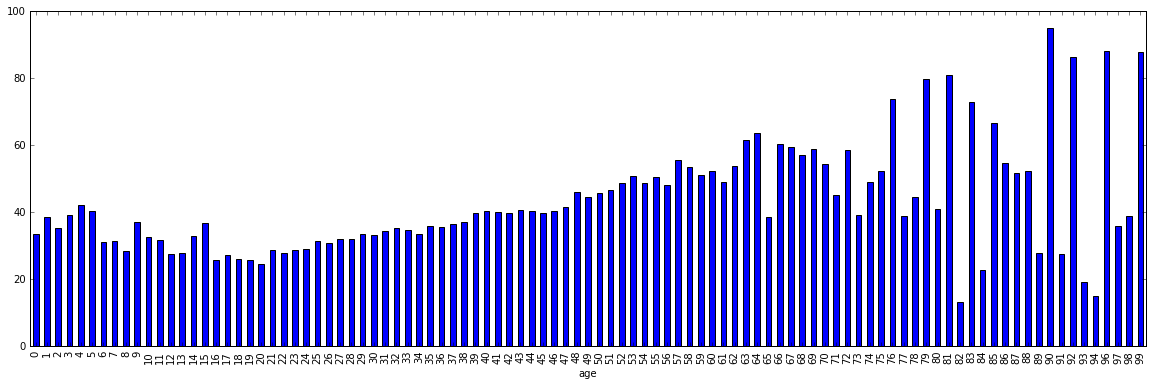

In [40]:
aggr_freq_urls.Mean_cnt.plot(kind="bar", figsize=(20, 6))

In [29]:
lda_model = pd.read_csv("readable_model", sep=";")

In [ ]:
"политика/спорт"

In [44]:
lda_model.sort_values(by="obj_25", ascending=False)[:10]

,token,class_id,obj_0,obj_1,obj_2,obj_3,obj_4,obj_5,obj_6,obj_7,...,obj_21,obj_22,obj_23,obj_24,obj_25,obj_26,obj_27,obj_28,obj_29,bkg
100478,сирия,Titles,3.132350e-09,5.400350e-09,5.533450e-12,9.969730e-11,1.691460e-14,3.300450e-15,1.289940e-09,3.860630e-15,...,2.318700e-09,3.219250e-16,5.474820e-08,6.470710e-14,0.065570,1.508760e-13,1.221980e-05,3.658670e-10,2.212490e-14,0.000000e+00
114272,рф,Titles,8.786900e-09,2.537550e-05,2.493590e-12,1.176810e-07,4.969250e-11,5.510030e-10,1.664640e-06,1.582490e-03,...,1.487860e-07,1.453640e-11,5.816160e-06,8.227060e-08,0.061599,9.828410e-10,3.218590e-13,2.370020e-08,1.515920e-15,4.553660e-12
64762,самолёт,Titles,3.238570e-12,2.624220e-10,3.422960e-10,3.590770e-06,7.999900e-06,1.192830e-16,3.202470e-09,0.000000e+00,...,5.043760e-15,1.546010e-15,3.061940e-10,3.631950e-11,0.034294,2.044160e-12,5.112250e-08,4.827980e-11,3.258420e-16,6.532250e-07
60858,почему,Titles,5.125020e-06,1.085200e-06,4.362360e-10,3.140830e-10,9.857570e-08,6.498500e-09,5.807070e-07,4.815530e-15,...,6.775770e-09,4.025520e-10,8.992880e-06,1.008580e-07,0.031782,2.533600e-08,1.828920e-07,2.006050e-06,1.313560e-12,3.590800e-07
107864,при,Titles,2.243090e-08,4.144160e-06,2.638990e-10,1.679710e-07,6.615910e-06,2.494660e-07,9.649180e-09,1.609360e-08,...,6.738620e-09,7.550890e-07,8.109750e-09,1.163110e-12,0.028900,2.728920e-07,2.022870e-07,3.210950e-09,3.488790e-12,4.821320e-11
154523,турция,Titles,3.784190e-03,6.935750e-03,8.369090e-12,2.730320e-11,1.971660e-13,2.513800e-12,1.708450e-09,1.772140e-11,...,5.288970e-05,5.032010e-10,1.135080e-09,3.796160e-08,0.019568,4.867180e-11,1.472390e-12,4.933100e-08,4.076560e-07,4.286530e-06
67311,войско,Titles,1.211840e-13,1.645840e-12,4.015780e-13,2.280990e-12,0.000000e+00,1.429170e-16,1.468700e-15,0.000000e+00,...,4.562280e-13,3.502610e-13,1.001690e-14,0.000000e+00,0.017965,0.000000e+00,5.530110e-10,3.320160e-15,0.000000e+00,1.804690e-15
59688,помощь,Titles,1.098690e-05,1.264950e-07,4.870950e-09,1.185090e-08,1.031870e-08,1.192000e-10,3.402610e-10,1.324910e-08,...,5.183680e-09,7.267280e-10,2.454320e-07,3.797660e-13,0.017016,2.709110e-12,7.876270e-12,1.083820e-07,7.728630e-13,6.548450e-10
134306,вывод,Titles,5.552030e-15,1.114400e-10,1.056600e-13,2.646820e-12,0.000000e+00,0.000000e+00,2.218940e-11,3.360940e-15,...,3.117800e-12,0.000000e+00,3.713780e-14,8.552590e-15,0.015455,0.000000e+00,1.090900e-09,2.134640e-15,0.000000e+00,0.000000e+00
61884,сбить,Titles,7.671230e-15,2.278810e-11,0.000000e+00,2.524610e-13,1.663740e-15,2.778030e-12,6.687840e-13,0.000000e+00,...,0.000000e+00,0.000000e+00,2.072360e-11,5.550390e-16,0.012901,4.872200e-13,4.806750e-10,3.413500e-11,0.000000e+00,1.042550e-16


### Create stack

In [10]:
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100

%matplotlib inline

In [214]:
def rmse(x,y):
    return np.mean((x - y) ** 2) ** 0.5

In [215]:
def weight_predict(df):
    weights = df.corr()["age"][:-1].values
    w = weights/weights.sum()
    
    #print rmse(df["age"], df["pred_age"])
    
    return w
    #df["pred_age"] = (df.drop("age", axis=1).as_matrix()*w).sum(axis=1)
    #print rmse(df["age"], df["pred_age"])
    

In [7]:
train_df = pd.read_csv("stacked_df_train.csv")
test_df = pd.read_csv("stacked_df_test.csv")
train_df.head()

,lr_titles,lr_titles2,tfidf_lr1,rf1,rf2,xgb_regr1,xgb_regr2,lr_urls,lr_urls2,lr_urls3,tfidf_lr2,rf3,rf4,xgb_regr3,xgb_regr4,rf5,xgb_regr5,lr_decades,light1,light2,light3,light4,light5,age
0,36.954034,37.587657,37.352441,38.101732,37.577289,38.555866,37.828114,32.441398,31.495446,32.199672,33.380552,35.527591,35.413735,38.555866,37.828114,36.361488,36.917892,37.524896,39.9837,37.7178,33.2913,32.8655,35.3987,53
1,45.794741,45.225146,44.835212,45.101997,46.496974,45.985104,47.406273,48.956252,49.160294,48.990912,47.624976,44.599285,44.607050,45.985104,47.406273,47.473686,48.359642,45.137212,48.2135,47.2616,47.3195,47.4347,48.4009,48
2,33.124688,31.038849,28.891744,33.430389,33.694263,32.415001,32.674854,33.887619,33.954232,33.143510,33.776631,36.136332,35.388930,32.415001,32.674854,25.311225,31.070028,32.531068,33.1372,33.4020,36.6497,33.3600,22.4887,28
3,34.129991,34.847749,38.879308,34.415176,34.484386,36.912338,36.164139,33.916929,35.248320,32.549132,33.259096,34.147282,34.894998,36.912338,36.164139,33.979250,33.980793,36.347521,35.1471,36.0093,36.2657,34.0589,33.8514,44
4,32.420218,31.095230,34.840319,31.664870,31.600219,33.893593,32.493324,37.106382,35.821612,38.135550,37.181859,34.672245,35.036889,33.893593,32.493324,39.179764,39.823811,37.026566,32.9087,31.8958,37.0896,35.4248,39.8305,48


In [50]:
train_df.columns

Index([u'lr_titles', u'lr_titles2', u'tfidf_lr1', u'rf1', u'rf2', u'xgb_regr1',
       u'xgb_regr2', u'lr_urls', u'lr_urls2', u'lr_urls3', u'tfidf_lr2',
       u'rf3', u'rf4', u'xgb_regr3', u'xgb_regr4', u'rf5', u'xgb_regr5',
       u'lr_decades', u'light1', u'light2', u'light3', u'light4', u'light5',
       u'age'],
      dtype='object')

In [8]:
train_df.shape, test_df.shape

((118679, 24), (19979, 23))

In [182]:
train_df_regroup = pd.concat([train_df[train_df.columns[:7]], train_df[train_df.columns[-6:-4]], 
                   train_df[train_df.columns[7:15]], train_df[train_df.columns[-4:-2]],
                   train_df[train_df.columns[15:18]], 
                   pd.DataFrame(train_df['light5'], columns=["light5"]),
                   pd.DataFrame(train_df['age'], columns=["age"])
                  ] ,axis=1)

test_df_regroup = pd.concat([test_df[test_df.columns[:7]], test_df[test_df.columns[-5:-3]], 
                   test_df[test_df.columns[7:15]], test_df[test_df.columns[-3:-1]],
                   test_df[test_df.columns[15:18]], 
                   pd.DataFrame(test_df['light5'], columns=["light5"]),
                  ] ,axis=1)

In [61]:
train_df_regroup.corr().head()

,lr_titles,lr_titles2,tfidf_lr1,rf1,rf2,xgb_regr1,xgb_regr2,light1,light2,lr_urls,lr_urls2,lr_urls3,tfidf_lr2,rf3,rf4,xgb_regr3,xgb_regr4,light3,light4,rf5,xgb_regr5,lr_decades,light5,age
lr_titles,1.000000,0.943051,0.887565,0.891312,0.889299,0.902589,0.877552,0.876011,0.848265,0.737708,0.753359,0.739885,0.750548,0.745997,0.740509,0.902589,0.877552,0.721738,0.721553,0.510018,0.482611,0.599865,0.485211,0.304348
lr_titles2,0.943051,1.000000,0.924285,0.872889,0.885452,0.891357,0.915324,0.871614,0.882341,0.741817,0.746727,0.740648,0.754471,0.740733,0.737563,0.891357,0.915324,0.726573,0.727753,0.531632,0.503432,0.618311,0.506308,0.319530
tfidf_lr1,0.887565,0.924285,1.000000,0.835142,0.847770,0.855639,0.881886,0.842502,0.860285,0.735163,0.721729,0.726801,0.748492,0.719994,0.720322,0.855639,0.881886,0.717674,0.724261,0.558009,0.529441,0.633541,0.532598,0.342715
rf1,0.891312,0.872889,0.835142,1.000000,0.965553,0.929080,0.897896,0.936039,0.894450,0.753898,0.769251,0.755805,0.755825,0.797218,0.793024,0.929080,0.897896,0.758710,0.757072,0.532448,0.503740,0.624240,0.506303,0.326535
rf2,0.889299,0.885452,0.847770,0.965553,1.000000,0.911518,0.915516,0.916453,0.916330,0.760944,0.774692,0.762293,0.763549,0.802432,0.798937,0.911518,0.915516,0.764596,0.763678,0.538494,0.509704,0.630987,0.512483,0.330629


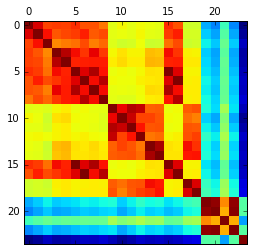

In [59]:
plt.matshow(train_df_regroup.corr())

In [227]:
titles_df_train = train_df_regroup[["tfidf_lr1", "age"]]
titles_nmf1_train = train_df_regroup[["lr_titles", "rf1", "xgb_regr1", "light1", "age"]]
titles_nmf2_train = train_df_regroup[["lr_titles2", "rf2", "xgb_regr2", "light2", "age"]]

urls_df_train = train_df_regroup[["tfidf_lr2", "lr_urls", "age"]]
urls_nmf1_train = train_df_regroup[["lr_urls2", "rf3", "xgb_regr3", "light3", "age"]]
urls_nmf2_train = train_df_regroup[["lr_urls3", "rf4", "xgb_regr4", "light4", "age"]]

decades_df_train = train_df_regroup[["lr_decades", "rf5", "xgb_regr5", "light5", "age"]]


titles_df_test = test_df_regroup[["tfidf_lr1",]]
titles_nmf1_test = test_df_regroup[["lr_titles", "rf1", "xgb_regr1", "light1", ]]
titles_nmf2_test = test_df_regroup[["lr_titles2", "rf2", "xgb_regr2", "light2", ]]

urls_df_test = test_df_regroup[["tfidf_lr2", "lr_urls", ]]
urls_nmf1_test = test_df_regroup[["lr_urls2", "rf3", "xgb_regr3", "light3", ]]
urls_nmf2_test = test_df_regroup[["lr_urls3", "rf4", "xgb_regr4", "light4", ]]

decades_df_test = test_df_regroup[["lr_decades", "rf5", "xgb_regr5", "light5", ]]

In [286]:
pred_weighted_df_train = pd.DataFrame()
pred_weighted_df_test = pd.DataFrame()

In [287]:
def fill_df_train(df_data, df_to_fill, colname):
    w = weight_predict(df_data)
    df_to_fill[colname] = (df_data.drop("age", axis=1).as_matrix()*w).sum(axis=1)
    return w

def fill_df_test(df_data, df_to_fill, colname):
    w = weight_predict(df_data)
    df_to_fill[colname] = (df_data.as_matrix()*w).sum(axis=1)
    return w

In [288]:
dfs_tr = [titles_df_train, titles_nmf1_train, titles_nmf2_train, urls_df_train, urls_nmf1_train, urls_nmf2_train,
      decades_df_train]

dfs_test = [titles_df_test, titles_nmf1_test, titles_nmf2_test, urls_df_test, urls_nmf1_test, urls_nmf2_test,
      decades_df_test]

cols = ['titles_df', 'titles_nmf1', 'titles_nmf2', 'urls_df', 'urls_nmf1', 'urls_nmf2', 'decades_df']

In [289]:
for i in range(len(dfs)):
    df_tr = dfs_tr[i]
    df_te = dfs_test[i]
    col = cols[i]
    weights = fill_df_train(df_tr, pred_weighted_df_train, col)
    pred_weighted_df_test[col] = (df_te.as_matrix()*weights).sum(axis=1)

In [290]:
df_2_level_train = pd.concat([pred_weighted_df_train, pd.DataFrame(titles_df_train.age, columns=["age"])], axis=1)
df_2_level_test = pred_weighted_df_test

In [291]:
w = weight_predict(df_2_level_train)
df_2_level_train["final_prediction"] = (df_2_level_train.drop("age", axis=1).as_matrix()*w).sum(axis=1)
df_2_level_test["final_prediction"] = (df_2_level_test.as_matrix()*w).sum(axis=1)

In [292]:
df_2_level_train.head()

,titles_df,titles_nmf1,titles_nmf2,urls_df,urls_nmf1,urls_nmf2,decades_df,age,final_prediction
0,37.352441,38.446949,37.680883,32.918292,34.745054,34.581369,36.501638,53,36.049204
1,44.835212,46.306784,46.629505,48.280242,46.733021,47.088625,47.454026,48,46.836601
2,28.891744,33.021418,32.727805,33.831260,34.837745,33.645558,27.616074,28,31.678035
3,38.879308,35.183610,35.400687,33.582887,35.656979,34.435168,34.449150,44,35.266492
4,34.840319,32.739736,31.787199,37.144709,35.390674,35.238979,39.062746,48,35.561614


In [284]:
rmse(df_2_level_train.age, df_2_level_train.final_prediction)

11.084644543101613

In [294]:
df_2_level_test.head()

,titles_df,titles_nmf1,titles_nmf2,urls_df,urls_nmf1,urls_nmf2,decades_df,final_prediction
0,37.956471,36.802960,38.236954,39.373565,38.245850,37.396804,40.496543,38.563866
1,42.016138,41.094441,37.327256,42.452737,37.257837,34.267654,44.027788,40.117074
2,33.862673,35.031691,33.125160,39.462190,36.001236,35.505240,47.946138,38.310776
3,33.744057,33.073895,32.807689,31.561507,36.759912,36.472013,42.699643,36.059756
4,35.189623,35.478234,36.101159,38.768342,34.922920,35.231779,36.917871,36.155976


In [300]:
df_2_level_test.shape

(19979, 8)

In [296]:
sample_subm = pd.read_csv("submissions/sample_submission.csv")

In [302]:
sample_subm["age"] = df_2_level_test.final_prediction

In [304]:
sample_subm.head()

,Id,age
0,000000014A02348E701552980349FF01,38.563866
1,000000014A10EA183BF8594A0B2AB201,40.117074
2,000000014A4FE5C33A929D4C26943601,38.310776
3,000000014B7BB9957784A9BC0AC9F401,36.059756
4,000000014C7749F896D82C2B01E8B801,36.155976


In [305]:
sample_subm.to_csv("weighted_average_after_big_preds.csv", index=False)

In [310]:
train_df.head()

,lr_titles,lr_titles2,tfidf_lr1,rf1,rf2,xgb_regr1,xgb_regr2,lr_urls,lr_urls2,lr_urls3,tfidf_lr2,rf3,rf4,xgb_regr3,xgb_regr4,rf5,xgb_regr5,lr_decades,light1,light2,light3,light4,light5,age
0,36.954034,37.587657,37.352441,38.101732,37.577289,38.555866,37.828114,32.441398,31.495446,32.199672,33.380552,35.527591,35.413735,38.555866,37.828114,36.361488,36.917892,37.524896,39.9837,37.7178,33.2913,32.8655,35.3987,53
1,45.794741,45.225146,44.835212,45.101997,46.496974,45.985104,47.406273,48.956252,49.160294,48.990912,47.624976,44.599285,44.607050,45.985104,47.406273,47.473686,48.359642,45.137212,48.2135,47.2616,47.3195,47.4347,48.4009,48
2,33.124688,31.038849,28.891744,33.430389,33.694263,32.415001,32.674854,33.887619,33.954232,33.143510,33.776631,36.136332,35.388930,32.415001,32.674854,25.311225,31.070028,32.531068,33.1372,33.4020,36.6497,33.3600,22.4887,28
3,34.129991,34.847749,38.879308,34.415176,34.484386,36.912338,36.164139,33.916929,35.248320,32.549132,33.259096,34.147282,34.894998,36.912338,36.164139,33.979250,33.980793,36.347521,35.1471,36.0093,36.2657,34.0589,33.8514,44
4,32.420218,31.095230,34.840319,31.664870,31.600219,33.893593,32.493324,37.106382,35.821612,38.135550,37.181859,34.672245,35.036889,33.893593,32.493324,39.179764,39.823811,37.026566,32.9087,31.8958,37.0896,35.4248,39.8305,48


In [307]:
test_df.head()

,lr_titles,lr_titles2,tfidf_lr1,rf1,rf2,xgb_regr1,xgb_regr2,lr_urls,lr_urls2,lr_urls3,tfidf_lr2,rf3,rf4,xgb_regr3,xgb_regr4,rf5,xgb_regr5,lr_decades,light1,light2,light3,light4,light5
0,36.585002,40.034638,37.956471,35.306915,34.851058,36.668873,38.828220,39.561297,39.013737,38.136618,39.191595,40.706421,40.267569,36.668873,38.828220,40.503409,39.921474,40.536542,38.5422,39.1991,36.7264,32.6675,41.0320
1,44.442559,41.893602,42.016138,40.353727,35.024469,41.523270,34.834545,41.484473,35.344624,34.819664,43.391289,36.407196,35.827088,41.523270,34.834545,44.504200,44.020145,43.659382,38.4224,37.7950,35.7499,31.7628,43.8589
2,34.166649,31.231423,33.862673,35.903603,33.364963,35.371494,33.721542,39.380980,35.420519,35.423484,39.540908,36.689321,37.585230,35.371494,33.721542,50.674043,49.521946,43.414823,34.6368,34.0279,36.4489,35.2911,47.3170
3,34.901884,32.974075,33.744057,32.449976,32.415150,32.554577,32.581848,32.900263,37.670660,34.209306,30.263833,38.395463,39.292337,32.554577,32.581848,43.412737,43.781075,39.562476,32.5606,33.2454,38.3489,39.4959,43.4434
4,35.851937,32.906776,35.189623,37.810935,39.279827,33.720486,35.864090,39.172225,34.157379,32.744347,38.376854,35.801407,35.563346,33.720486,35.864090,36.908550,36.787926,37.131295,34.6626,36.2477,35.8878,36.5493,36.8846


In [315]:
from sklearn.linear_model import LinearRegression, Ridge

In [316]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop("age", axis=1), train_df["age"], test_size=0.33, random_state=42)

In [325]:
lr = LinearRegression()

In [326]:
lr.fit(X_train, y_train)
pr = lr.predict(X_test)
print rmse(y_test, pr)

9.9228598935


In [ ]:
## all set

In [327]:
lr.fit(train_df.drop("age", axis=1), train_df["age"])
pr = lr.predict(test_df)

In [329]:
sample_subm["age"] = pr
sample_subm.to_csv("linreg_after_big_preds.csv", index=False)

In [331]:
## after one_level of aggregation

In [333]:
X_train, X_test, y_train, y_test = train_test_split(df_2_level_train.drop(["age", "final_prediction"], axis=1), df_2_level_train["age"], test_size=0.33, random_state=42)

In [336]:
lr.fit(X_train, y_train)
pr = lr.predict(X_test)

print rmse(y_test, pr)

9.97152600539


In [340]:
df_2_level_train.shape

(118679, 9)

In [343]:
lr.fit(df_2_level_train.drop(["age", "final_prediction"], axis=1), df_2_level_train["age"])
pr = lr.predict(df_2_level_test.drop("final_prediction", axis=1))

In [344]:
pr

array([ 40.50135267,  43.12208319,  48.39174837, ...,  35.79776882,
        35.79776882,  35.29847428])

In [345]:
sample_subm["age"] = pr
sample_subm.to_csv("linreg_on_fist_level_agg_preds.csv", index=False)